In [1]:
from aiml import MLModels
from sklearn.preprocessing import MinMaxScaler

/Users/edavid/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Classification

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
MLModels.random_state = 10510084 # should generate the same state so we can write tests
MLModels.n_trials = 2 # Change n_trials for all models, lazy to wait so setting this to a low value
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names)

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)



                      Model  Accuracy   Best Parameter   Top Predictor
0                       KNN  0.933566  n_neighbors = 8            None
1  Logistic Regression (L1)  0.979021           C = 10  mean perimeter
2  Logistic Regression (L2)  0.979021          C = 100  mean perimeter
3           Linear SVM (L1)  0.986014            C = 5  mean perimeter
4           Linear SVM (L2)  0.982517         C = 1000     mean radius


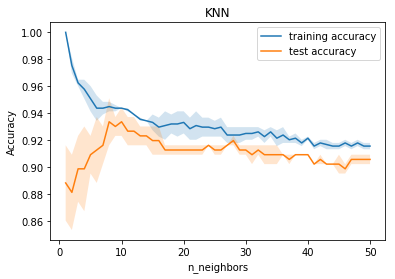

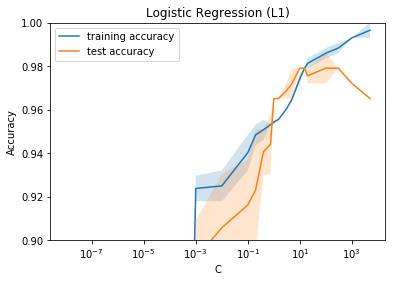

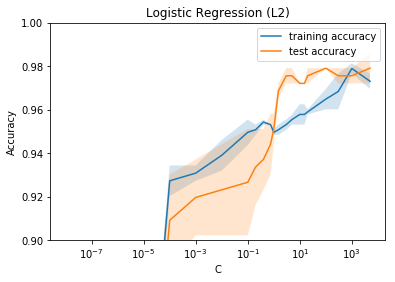

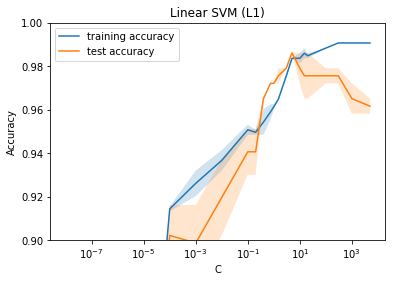

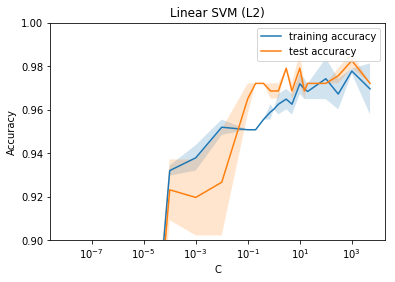

In [4]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)
    if k != 'KNN':
        ax.set_ylim(0.9, 1)
        ax.set_xscale('log')

In [5]:
MLModels.summarize(m, cancer.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,None
1,Logistic Regression (L1),0.979021,C = 10,mean perimeter
2,Logistic Regression (L2),0.979021,C = 100,mean perimeter
3,Linear SVM (L1),0.986014,C = 5,mean perimeter
4,Linear SVM (L2),0.982517,C = 1000,mean radius


### Scaling the data

In [6]:
MLModels.n_trials = 2
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, scaler=MinMaxScaler())

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)



                      Model  Accuracy   Best Parameter         Top Predictor
0                       KNN  0.986014  n_neighbors = 3                  None
1  Logistic Regression (L1)  0.989510         C = 0.75           mean radius
2  Logistic Regression (L2)  0.993007            C = 3   mean concave points
3           Linear SVM (L1)  0.993007            C = 1  worst concave points
4           Linear SVM (L2)  0.993007          C = 0.4   mean concave points


## Regression

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
MLModels.n_trials = 2
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names)

Lasso



Ridge



   Model  Accuracy Best Parameter Top Predictor
0  Lasso  0.708417  alpha = 1e-12           NOX
1  Ridge  0.708417  alpha = 1e-12           NOX


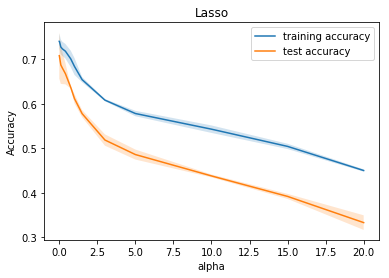

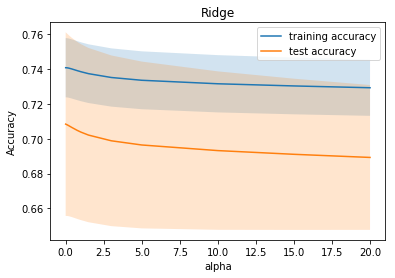

In [9]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)

In [10]:
MLModels.summarize(m, boston.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,Lasso,0.708417,alpha = 1e-12,NOX
1,Ridge,0.708417,alpha = 1e-12,NOX
